### The wine data set is a good one to begin one's journey into unsupervised learning.

Further details on the data set can be found at: https://archive.ics.uci.edu/dataset/109/wine

The dataset has been loaded into Scikit-Learn where one may use supervised learning if the target values are used. Without, we can treat the problem as an unsupervised one.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

In [2]:
# load the dataset
wine = datasets.load_wine(as_frame=True)

# since we want to proceed with unsupervised learning, we drop the target column and only retain the other 13 features
w_df = pd.DataFrame(data=wine.data)

In [3]:
w_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


It's always a good idea to get a feel for the data

In [4]:
w_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

All seems good above, we can proceed further.

### PCA

We can't visualize 13 dimensions, so let's trim this down a bit. This is where PCA comes in.

In [6]:
# let's decompose the data into the top 2 principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# fit and transform the data into these two components
X_new = pca.fit_transform(w_df)

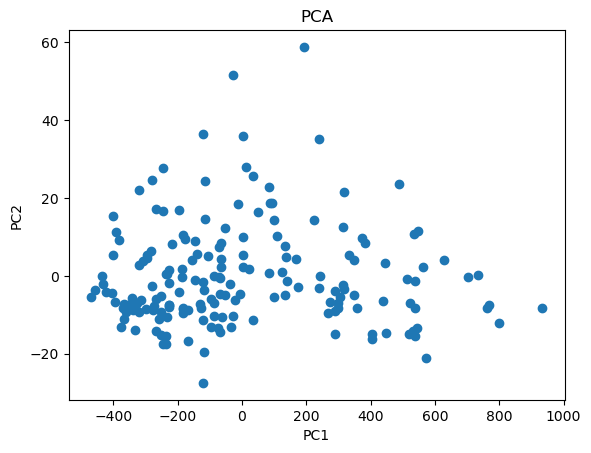

In [7]:
plt.title('PCA')
plt.scatter(X_new[:,0],X_new[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

We see above that the data is not well separated even after doing PCA. We might have to do some more preprocessing to make it work better.

In [8]:
# preprocess the data
from sklearn.preprocessing import quantile_transform
X = quantile_transform(w_df, copy=True)

/home/dsigdel/miniconda3/envs/ML2025/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (178). n_quantiles is set to n_samples.
  warnings.warn(


You can find more about `quantile_transform` here https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html

In [9]:
# now let's try PCA again on this data
pca2 = PCA(n_components=2)

# fit and transform the data into these two components
X_new2 = pca2.fit_transform(X)

We're using two components only but you might want to check how many components need to be retained for a particular problem.

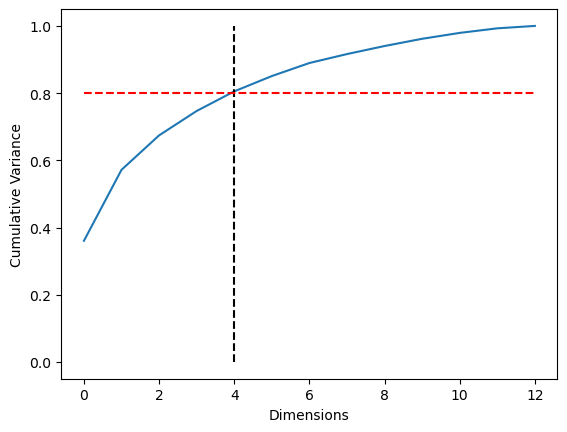

In [10]:
# how many dimensions are needed for some% explanation of the data
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)
plt.vlines(4,0,1,color='k',linestyles='dashed')
plt.hlines(0.8,0,12,color='r',linestyles='dashed')
plt.xlabel('Dimensions')
plt.ylabel('Cumulative Variance')

plt.show()

A plot like above can guide you on how many components should you retain to describe how much of the data. For example, to explain over 80% of the variance in the data, you would need at least four components.

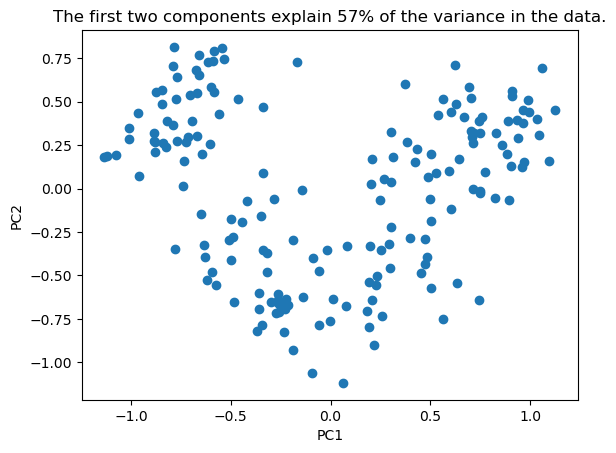

In [11]:
# total variance explained by these components
expl_var2 = pca2.explained_variance_ratio_.sum()

# plot
plt.title(f'The first two components explain {expl_var2:.0%} of the variance in the data.')
plt.scatter(X_new2[:,0],X_new2[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Much better! Now we move on to clustering.

### K-means clustering

Before attempting to separate the data into clusters, you might want to do a hyperparameter optimization. One quick test is to try some k values and check the silhouette scores

In [12]:
from sklearn import metrics
from sklearn.cluster import k_means,DBSCAN
from sklearn.metrics import silhouette_score

In [13]:
# let's iterate over some k-values and print their silhouette scores to pick the best k parameter
ks = np.arange(2,10,1)
for i, ks in enumerate(ks):
    centroid, label, inertia = k_means(X_new2, n_clusters=ks, n_init="auto", random_state=42)
    silhouette_avg = silhouette_score(X_new2, label)
    print(f'silhouette score for k={ks} is: {silhouette_avg:.2f}')

silhouette score for k=2 is: 0.47
silhouette score for k=3 is: 0.56
silhouette score for k=4 is: 0.51
silhouette score for k=5 is: 0.46
silhouette score for k=6 is: 0.45
silhouette score for k=7 is: 0.43
silhouette score for k=8 is: 0.42
silhouette score for k=9 is: 0.41


$k=3$ has the maximum score so we proceed with that value

In [14]:
# try k means first
k = 3
centroid, label, inertia = k_means(X_new2, n_clusters=k, n_init="auto", random_state=42)

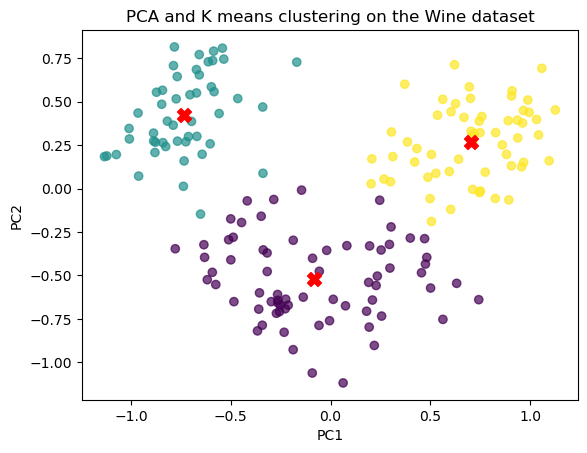

In [15]:
# how much of the data is explained by these components
expl_var2 = pca2.explained_variance_ratio_.sum()

plt.title('PCA and K means clustering on the Wine dataset')
plt.scatter(X_new2[:,0],X_new2[:,1],c=label,alpha=0.7)
plt.scatter(centroid[:,0],centroid[:,1],c='r',marker='X',s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()